# Data import and save

Loading images


100%|██████████| 3875/3875 [00:22<00:00, 171.55it/s]


(5216, 200, 200)
(5216,)
(array(['bacteria', 'normal', 'virus'], dtype='<U8'), array([2530, 1341, 1345], dtype=int64))
Display several images


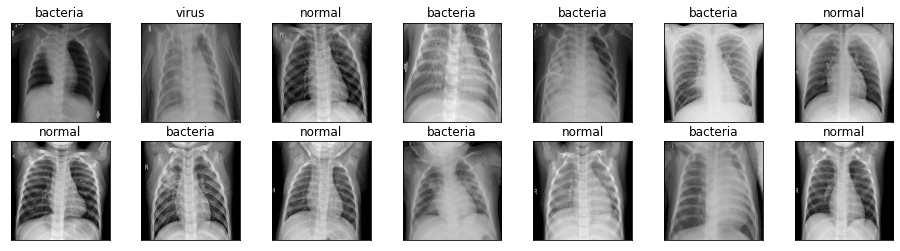

Loading test images


100%|██████████| 390/390 [00:01<00:00, 199.78it/s]


In [7]:
import os
import cv2
import pickle	# Used to save variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm	# Used to display progress bar
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator	# Used to generate images

np.random.seed(22)

# Do not forget to include the last slash
def load_normal(norm_path):
    norm_files = np.array(os.listdir(norm_path))
    norm_labels = np.array(['normal']*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
		# Read image
        image = cv2.imread(norm_path + image)
		# Resize image to 200x200 px
        image = cv2.resize(image, dsize=(200,200))
		# Convert to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels

def load_pneumonia(pneu_path):
    pneu_files = np.array(os.listdir(pneu_path))
    pneu_labels = np.array([pneu_file.split('_')[1] for pneu_file in pneu_files])
    
    pneu_images = []
    for image in tqdm(pneu_files):
		# Read image
        image = cv2.imread(pneu_path + image)
		# Resize image to 200x200 px
        image = cv2.resize(image, dsize=(200,200))
		# Convert to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pneu_images.append(image)
        
    pneu_images = np.array(pneu_images)
    
    return pneu_images, pneu_labels


print('Loading images')
# All images are stored in _images, all labels are in _labels
norm_images, norm_labels = load_normal("chest_xray\\train\\NORMAL\\")
pneu_images, pneu_labels = load_pneumonia("chest_xray\\train\\PNEUMONIA\\")

# Put all train images to X_train 
X_train = np.append(norm_images, pneu_images, axis=0)

# Put all train labels to y_train
y_train = np.append(norm_labels, pneu_labels)

print(X_train.shape)
print(y_train.shape)
# Finding out the number of samples of each class
print(np.unique(y_train, return_counts=True))

print('Display several images')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(16, 4))

indices = np.random.choice(len(X_train), 14)
counter = 0

for i in range(2):
    for j in range(7):
        axes[i,j].set_title(y_train[indices[counter]])
        axes[i,j].imshow(X_train[indices[counter]], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        counter += 1
plt.show()


print('Loading test images')
# Do the exact same thing as what we have done on train data
norm_images_test, norm_labels_test = load_normal("chest_xray\\test\\NORMAL\\")
pneu_images_test, pneu_labels_test = load_pneumonia("chest_xray\\test\\PNEUMONIA\\")
X_test = np.append(norm_images_test, pneu_images_test, axis=0)
y_test = np.append(norm_labels_test, pneu_labels_test)


# Save the loaded images to pickle file for future use
with open('pneumonia_data_test.pickle', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)


# Data load and prepare for model

Loading images


100%|██████████| 3875/3875 [00:22<00:00, 173.75it/s]


(5216, 200, 200)
(5216,)
(array(['bacteria', 'normal', 'virus'], dtype='<U8'), array([2530, 1341, 1345], dtype=int64))
Display several images


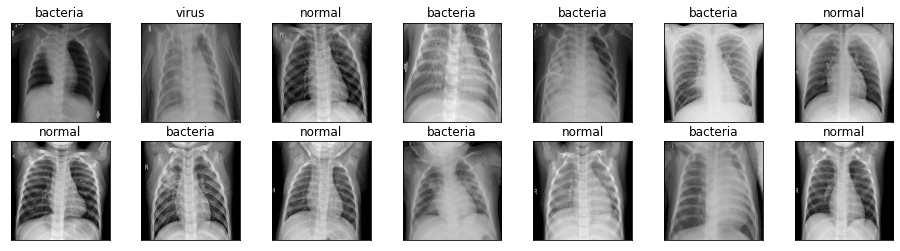

Loading test images


100%|██████████| 390/390 [00:01<00:00, 198.42it/s]


Label preprocessing
Reshaping X data
Data augmentation
CNN
(200, 200, 1)


<ipython-input-1-21bc36a9f1f4>:163: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=30,


Epoch 1/30
163/163 [==============================] - 13s 65ms/step - loss: 2.9138 - acc: 0.6116 - val_loss: 0.8091 - val_acc: 0.6811
Epoch 2/30
163/163 [==============================] - 10s 64ms/step - loss: 0.6851 - acc: 0.7017 - val_loss: 0.7802 - val_acc: 0.6763
Epoch 3/30
163/163 [==============================] - 10s 64ms/step - loss: 0.6258 - acc: 0.7356 - val_loss: 0.7025 - val_acc: 0.7580
Epoch 4/30
163/163 [==============================] - 10s 64ms/step - loss: 0.6126 - acc: 0.7339 - val_loss: 0.7199 - val_acc: 0.8061
Epoch 5/30
163/163 [==============================] - 10s 64ms/step - loss: 0.6254 - acc: 0.7404 - val_loss: 0.8585 - val_acc: 0.7532
Epoch 6/30
163/163 [==============================] - 10s 64ms/step - loss: 0.5727 - acc: 0.7625 - val_loss: 0.7093 - val_acc: 0.7564
Epoch 7/30
163/163 [==============================] - 10s 64ms/step - loss: 0.5703 - acc: 0.7523 - val_loss: 0.9081 - val_acc: 0.7260
Epoch 8/30
163/163 [==============================] - 11s 65ms

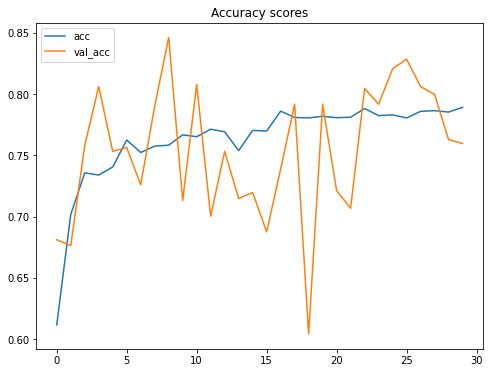

Displaying loss


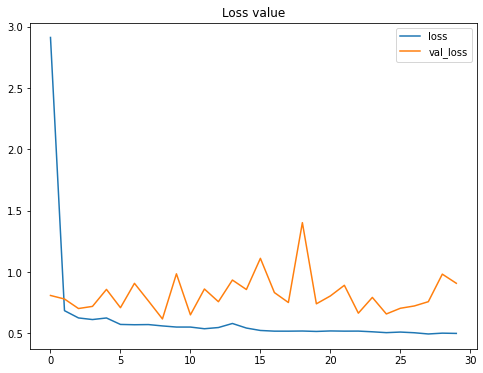

[[3.8745853e-01 1.9036138e-01 4.2218015e-01]
 [6.7823961e-02 6.6729033e-01 2.6488575e-01]
 [4.8337016e-01 2.5916191e-02 4.9071363e-01]
 ...
 [7.6679444e-01 2.1296462e-05 2.3318423e-01]
 [7.0520610e-01 5.5735927e-05 2.9473811e-01]
 [9.2451191e-01 1.3715273e-03 7.4116521e-02]]
Model evaluation
[array(['bacteria', 'normal', 'virus'], dtype='<U8')]


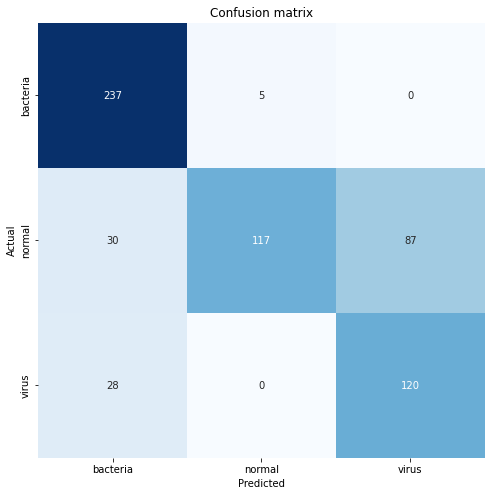

In [1]:
import os
import cv2
import pickle	# Used to save variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm	# Used to display progress bar
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator	# Used to generate images

# Here's how to load it
with open('pneumonia_data_test.pickle', 'rb') as f:
    (X_train, X_test, y_train, y_test) = pickle.load(f)

print('Label preprocessing')

# Create new axis on all y data
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

# Initialize OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse=False)

# Convert all labels to one-hot
y_train_one_hot = one_hot_encoder.fit_transform(y_train)
y_test_one_hot = one_hot_encoder.transform(y_test)

print('Reshaping X data')
# Reshape the data into (no of samples, height, width, 1), where 1 represents a single color channel
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print('Data augmentation')
# Generate new images with some randomness
datagen = ImageDataGenerator(
		rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train_one_hot, batch_size = 32)

print('CNN')



# Model training and saving

In [ ]:
# Define the input shape of the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
print(input_shape)

input1 = Input(shape=input_shape)

cnn = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(input1)
cnn = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)

cnn = Conv2D(16, (2, 2), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = Conv2D(32, (2, 2), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)

cnn = Flatten()(cnn)
cnn = Dense(100, activation='relu')(cnn)
cnn = Dense(50, activation='relu')(cnn)
output1 = Dense(3, activation='softmax')(cnn)

model = Model(inputs=input1, outputs=output1)

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['acc'])

# Using fit_generator() instead of fit() because we are going to use data
# taken from the generator. Note that the randomness is changing
# on each epoch
history = model.fit_generator(train_gen, epochs=30, 
          validation_data=(X_test, y_test_one_hot))

In [ ]:
# Saving model
model.save('pneumonia_cnn.h5')

print('Displaying accuracy')
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.show()

print('Displaying loss')
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()


# Predicting test data

[[3.8745853e-01 1.9036138e-01 4.2218015e-01]
 [6.7823961e-02 6.6729033e-01 2.6488575e-01]
 [4.8337016e-01 2.5916191e-02 4.9071363e-01]
 ...
 [7.6679444e-01 2.1296462e-05 2.3318423e-01]
 [7.0520610e-01 5.5735927e-05 2.9473811e-01]
 [9.2451191e-01 1.3715273e-03 7.4116521e-02]]
[['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['normal']
 ['n

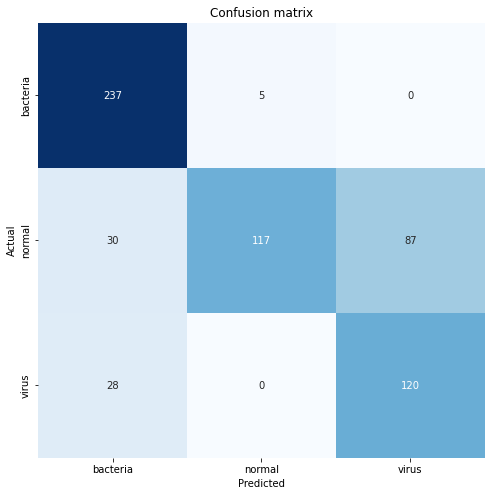

In [5]:
# Predicting test data
predictions = model.predict(X_test)
print(predictions)
print(y_test)
predictions = one_hot_encoder.inverse_transform(predictions)

print('Model evaluation')
print(one_hot_encoder.categories_)

classnames = ['bacteria', 'normal', 'virus']

# Display confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()